# PythonでPCAを実装

step1共分散行列を計算

step2固有値と固有ベクトルを計算

step3特徴変換

In [1]:
#ライブラリーをインポート
import pandas as pd
import numpy as np

from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline
df_wine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header = None)


/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/Users/ranmarusato/.matplotlib/matplotlibrc", line #629
  (fname, cnt))


In [2]:
#説明変数と目的変数にそれぞれ代入
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X.shape

(178, 13)


In [3]:
# 標準化(平均:0,分散:1)
#アルコール度数やワインの色相など、単位も基準となる値もバラバラな 様々な種類のデータを同じように扱うこと

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAMincho'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


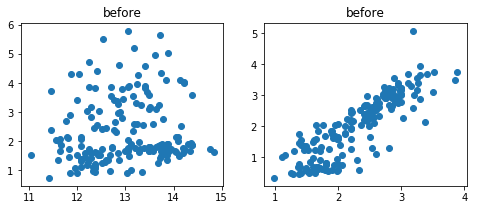

before
mean:  [  1.30006180e+01   2.33634831e+00   2.36651685e+00   1.94949438e+01
   9.97415730e+01   2.29511236e+00   2.02926966e+00   3.61853933e-01
   1.59089888e+00   5.05808988e+00   9.57449438e-01   2.61168539e+00
   7.46893258e+02] 
std:  [  8.09542915e-01   1.11400363e+00   2.73572294e-01   3.33016976e+00
   1.42423077e+01   6.24090564e-01   9.96048950e-01   1.24103260e-01
   5.70748849e-01   2.31176466e+00   2.27928607e-01   7.07993265e-01
   3.14021657e+02]


In [4]:
# 標準化前のデータを可視化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
ax1.set_title('before')
ax2.set_title('before')
ax1.scatter(X[:, 0], X[:, 1])
ax2.scatter(X[:, 5], X[:, 6])
plt.show()

print("before")
print("mean: ", X.mean(axis=0), "\nstd: ", X.std(axis=0))

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAMincho'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


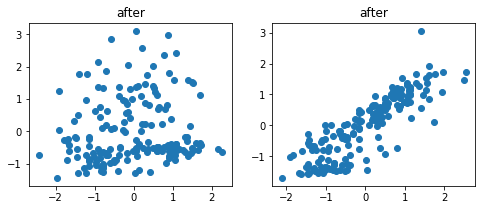

after
mean:  [ -8.38280756e-16  -1.19754394e-16  -8.37033314e-16  -3.99181312e-17
  -3.99181312e-17   0.00000000e+00  -3.99181312e-16   3.59263181e-16
  -1.19754394e-16   3.49283648e-17   1.99590656e-16   3.19345050e-16
  -1.59672525e-16] 
std:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [5]:
#標準化
X = (X-X.mean(axis=0))/X.std(axis=0)

# 標準化後のデータを可視化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
ax1.set_title('after')
ax2.set_title('after')
ax1.scatter(X[:, 0], X[:, 1])
ax2.scatter(X[:, 5], X[:, 6])
plt.show()

print("after")
print("mean: ", X.mean(axis=0), "\nstd: ", X.std(axis=0))

関連の高そうなデータをまとめて圧縮
特徴ごとの類似度を調べるために、相関行列を定義
13種類の特徴データについて、それぞれの相関係数を保持する13x13の相関行列を求める

共分散np.cov(x,y)

https://betashort-lab.com/%E7%B5%B1%E8%A8%88%E3%81%A8%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92/%E7%B5%B1%E8%A8%88%E5%AD%A6/python%E3%81%A7%E7%B5%B1%E8%A8%88-%E5%85%B1%E5%88%86%E6%95%A3%E3%81%A8%E7%9B%B8%E9%96%A2%E4%BF%82%E6%95%B0/

\begin{pmatrix} S_{xx} & S_{xy} \\ S_{yx} & S_{yy} \end{pmatrix}

xの分散：1.0162247633610275
yの分散：15.552293147067942
\共分散：[[  1.01724201   0.07678832]
 [  0.07678832  15.56786101]]



/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAMincho'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


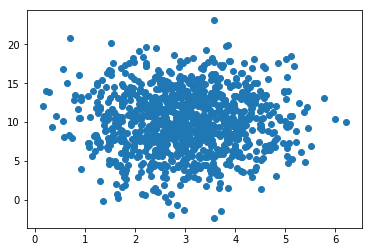

In [21]:
x = np.random.normal(3.0, 1.0, 1000)
y = np.random.normal(10.0, 4.0, 1000)
 
#共分散行列を求める

covs = np.cov(x, y)
 
print("xの分散：{0}\nyの分散：{1}\n\共分散：{2}\n".format(np.var(x),np.var(y),covs))

#散布図
plt.show(scatter(x, y))

# 相関行列
それぞれのデータに対して、「データから平均値を引いて、標準偏差で割る」という操作（基準化）をすると、この分散共分散行列の対角成分がすべて1になる（元のデータに固有の平均値や標準偏差の大きさに影響されなくなる）。





相関係数np.corrcoef(x,y)

\begin{pmatrix} r_{xx} & r_{xy} \\ r_{yx} & r_{yy} \end{pmatrix}

相関係数：[[ 1.       -0.001126]
 [-0.001126  1.      ]]


/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAMincho'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


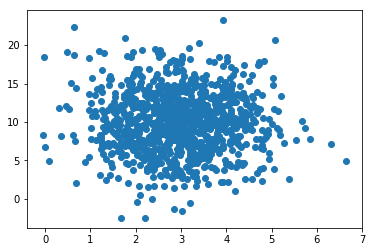

In [8]:
 
x = np.random.normal(3.0, 1.0, 1000)
y = np.random.normal(10.0, 4.0, 1000)
 
#相関係数
cor = np.corrcoef(x, y)
 
print("相関係数：{0}".format(cor))
 
#散布図
plt.show(scatter(x, y))

In [9]:
# 13*13の相関行列
# R = np.corrcoef(X.T)
#共分散行列
R = np.cov(X.T)

In [10]:
R

array([[ 1.00564972,  0.09493026,  0.21273976, -0.31198788,  0.27232816,
         0.29073446,  0.23815287, -0.15681042,  0.13747022,  0.549451  ,
        -0.07215255,  0.07275191,  0.64735687],
       [ 0.09493026,  1.00564972,  0.16497228,  0.29013035, -0.05488343,
        -0.3370606 , -0.41332866,  0.29463237, -0.22199334,  0.25039204,
        -0.56446685, -0.37079354, -0.19309537],
       [ 0.21273976,  0.16497228,  1.00564972,  0.44587209,  0.28820583,
         0.12970824,  0.11572743,  0.1872826 ,  0.00970647,  0.2603499 ,
        -0.07508874,  0.00393333,  0.22488969],
       [-0.31198788,  0.29013035,  0.44587209,  1.00564972, -0.0838039 ,
        -0.32292752, -0.353355  ,  0.36396647, -0.19844168,  0.01883781,
        -0.27550299, -0.27833221, -0.44308618],
       [ 0.27232816, -0.05488343,  0.28820583, -0.0838039 ,  1.00564972,
         0.21561254,  0.19688989, -0.25774204,  0.23777643,  0.20107967,
         0.05571118,  0.06637684,  0.39557317],
       [ 0.29073446, -0.337060

In [11]:
X = (X-X.mean(axis=0))/X.std(axis=0)

In [22]:
# 固有値分解
# 相関行列から固有対を取得。 numpy.linalg.eighはそれらを固有値の昇順で返す
eigvals, eigvecs = np.linalg.eigh(R)

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAMincho'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


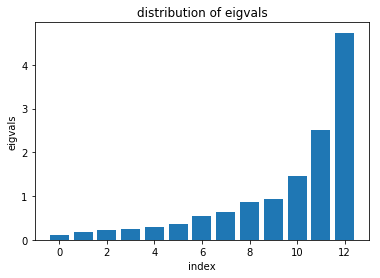

In [23]:
# 可視化
plt.bar(range(13), eigvals)
plt.title("distribution of eigvals")
plt.xlabel("index")
plt.ylabel("eigvals")
plt.show()

In [24]:
print(eigvals)

[ 0.10396199  0.16972374  0.22706428  0.25232001  0.29051203  0.35046627
  0.55414147  0.64528221  0.85804868  0.92416587  1.45424187  2.51108093
  4.73243698]


In [25]:
# 変換行列の取得。昇順なので後ろから２つをとってくる
W = np.c_[eigvecs[:,-1], eigvecs[:,-2]]

In [28]:
W.shape

(13, 2)

In [29]:
X.shape

(178, 13)

In [26]:
# 特徴変換　
#次元を２次元に圧縮する特徴変換
X_pca = X.dot(W)

In [27]:
X_pca 

array([[-3.31675081,  1.44346263],
       [-2.20946492, -0.33339289],
       [-2.51674015,  1.0311513 ],
       [-3.75706561,  2.75637191],
       [-1.00890849,  0.86983082],
       [-3.05025392,  2.12240111],
       [-2.44908967,  1.17485013],
       [-2.05943687,  1.60896307],
       [-2.5108743 ,  0.91807096],
       [-2.75362819,  0.78943767],
       [-3.47973668,  1.30233324],
       [-1.7547529 ,  0.61197723],
       [-2.11346234,  0.67570634],
       [-3.45815682,  1.13062988],
       [-4.31278391,  2.09597558],
       [-2.3051882 ,  1.66255173],
       [-2.17195527,  2.32730534],
       [-1.89897118,  1.63136888],
       [-3.54198508,  2.51834367],
       [-2.0845222 ,  1.06113799],
       [-3.12440254,  0.78689711],
       [-1.08657007,  0.24174355],
       [-2.53522408, -0.09184062],
       [-1.64498834, -0.51627893],
       [-1.76157587, -0.31714893],
       [-0.9900791 ,  0.94066734],
       [-1.77527763,  0.68617513],
       [-1.23542396, -0.08980704],
       [-2.18840633,